<a href="https://colab.research.google.com/github/Wanman-Gao/Kaggle_Wanman/blob/main/Kaggle_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [8]:

import pandas as pd

# read csv file
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


In [9]:

print("Train head:")
print(train_df.head())

print("Test head:")
print(test_df.head())

Train head:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008 

In [10]:

print("Train info:")
train_df.info()

print("Test info:")
test_df.info()


Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read dataframe
train_df = pd.read_csv('train.csv')

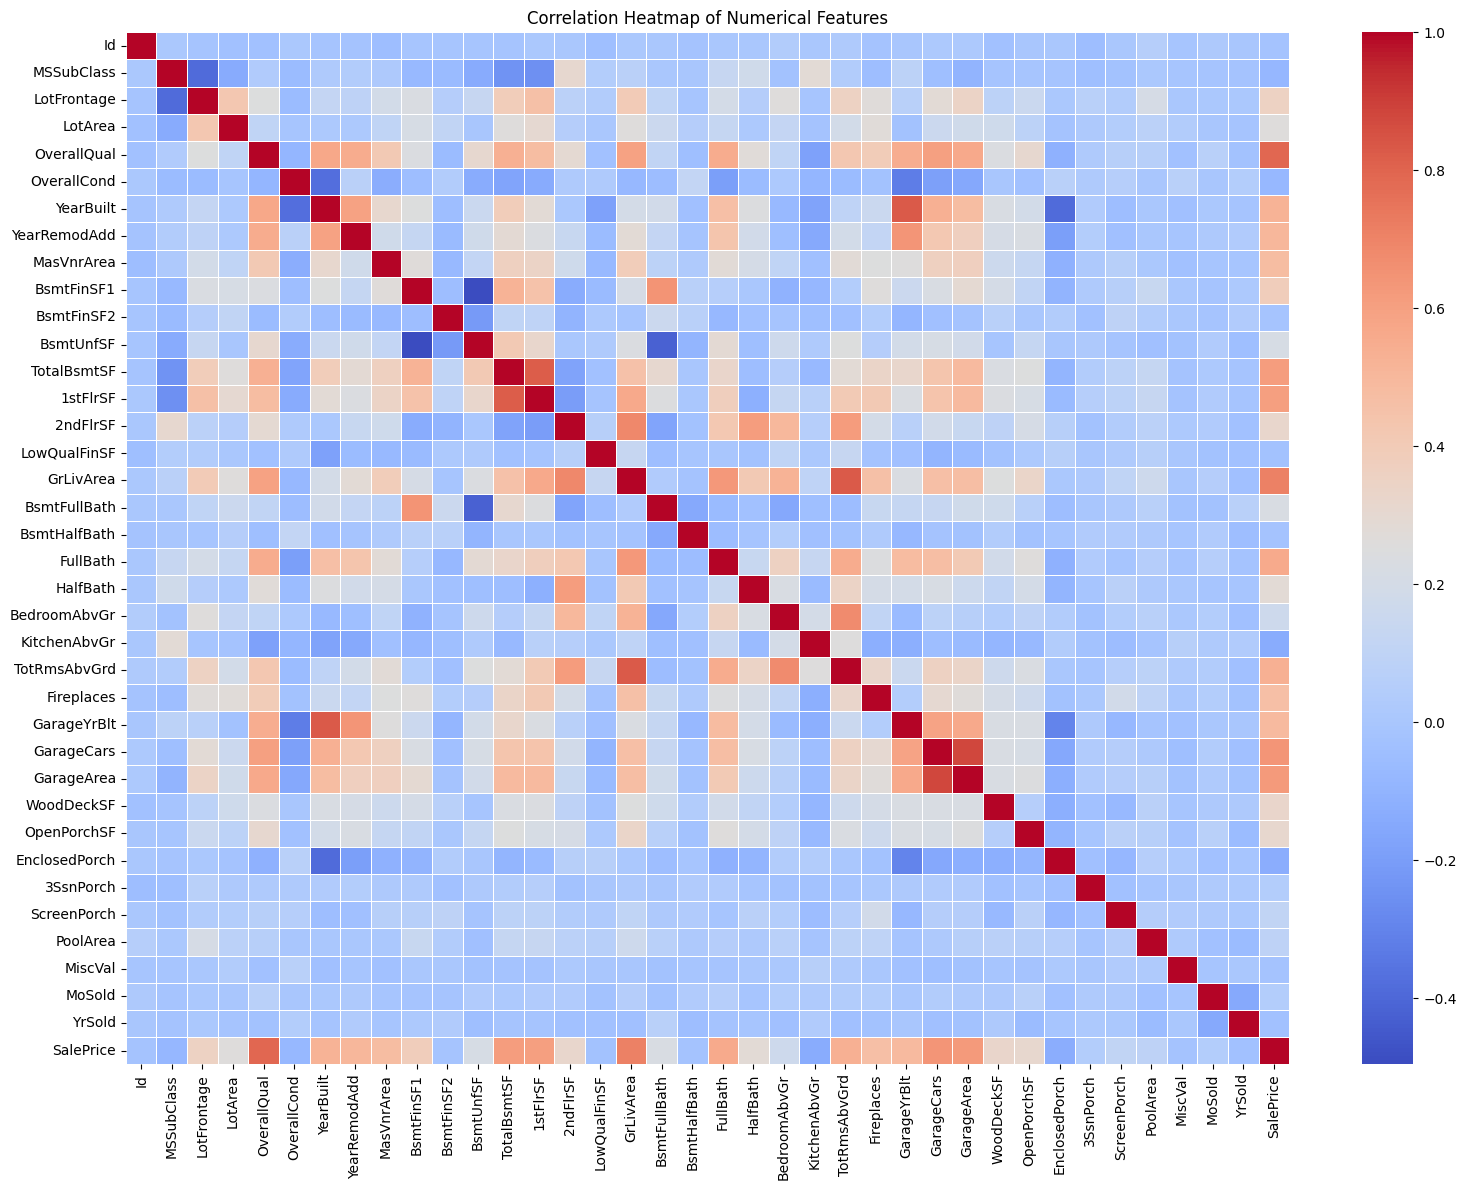

In [12]:
numeric_df = train_df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

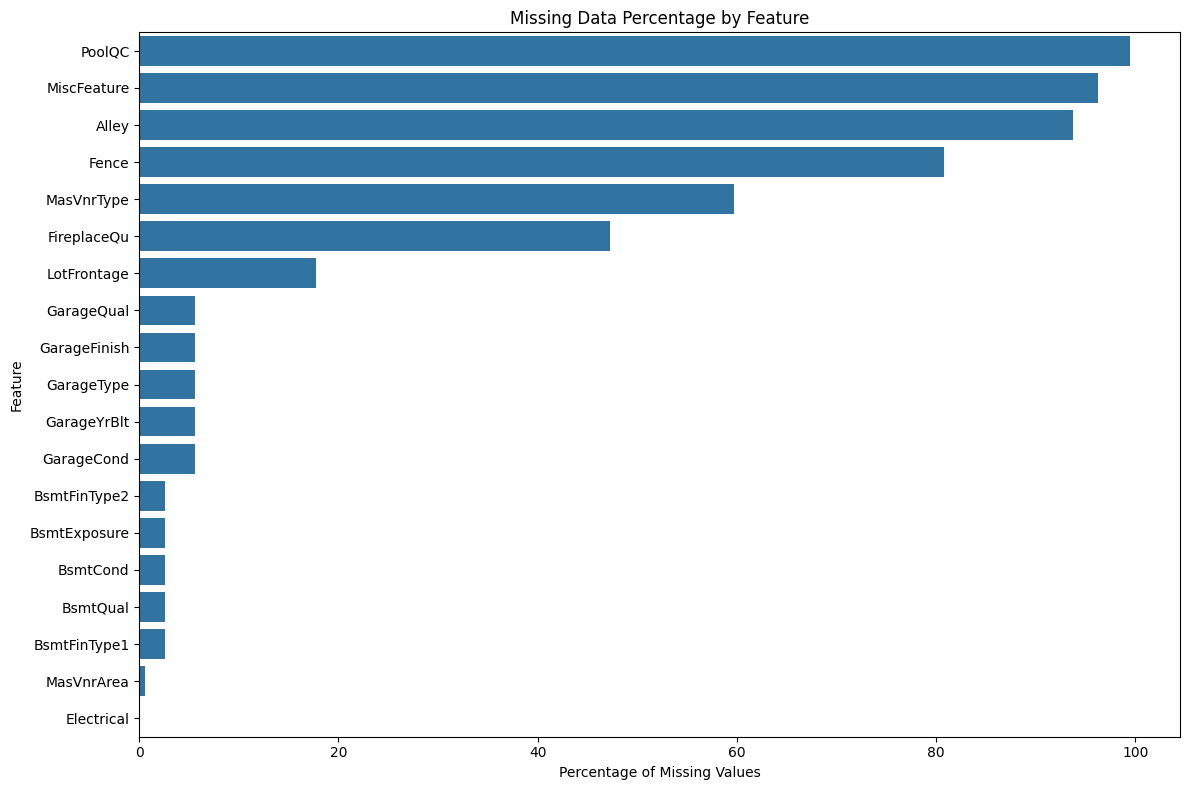

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_percent = train_df.isnull().mean().sort_values(ascending=False) * 100
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.title('Missing Data Percentage by Feature')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [14]:
missing_ratio = train_df.isnull().sum() / len(train_df)
cols_to_drop = missing_ratio[missing_ratio > 0.2].index
df_cleaned_train = train_df.drop(columns=cols_to_drop)

X = df_cleaned_train.drop(['SalePrice'], axis=1)  # Drop 'SalePrice' from features
y = df_cleaned_train['SalePrice']                 # Select the 'SalePrice' column as the target



In [15]:
import numpy as np
y_log = np.log1p(y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y_train_log

,SalePrice
254,145000
1066,178000
638,85000
799,175000
380,127000
...,...
1095,176432
1130,135000
1294,115000
860,189950


In [18]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

In [19]:
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].median())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_test[numerical_cols].median())
print(X_train[numerical_cols].isnull().sum())


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [20]:

categorical_cols = X_train.select_dtypes(include=['object']).columns

# Use 'Unknown' to fill the NAs in all features
X_train[categorical_cols] = X_train[categorical_cols].fillna('Unknown')
X_test[categorical_cols] = X_test[categorical_cols].fillna('Unknown')

X_test[categorical_cols].isnull().sum()


,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# combine two dataframe
combined = pd.concat([X_train, X_test], axis=0)

# Do Label Encoding for all object
for col in combined.select_dtypes(include='object').columns:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))


X_train_encoded = combined.iloc[:len(X_train), :].copy()
X_test_encoded = combined.iloc[len(X_train):, :].copy()


In [22]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import numpy as np


model = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_encoded, y_train_log)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

In [23]:
best_model = grid_search.best_estimator_


In [25]:
# Validation RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
test_preds_log = best_model.predict(X_test_encoded)
val_rmse = np.sqrt(mean_squared_error(y_test_log, test_preds_log))
print("Validation log-RMSE:", val_rmse)


Validation log-RMSE: 25162.073046551628


Begin to do with the test.csv

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read test dateset
test_df = pd.read_csv('test.csv')


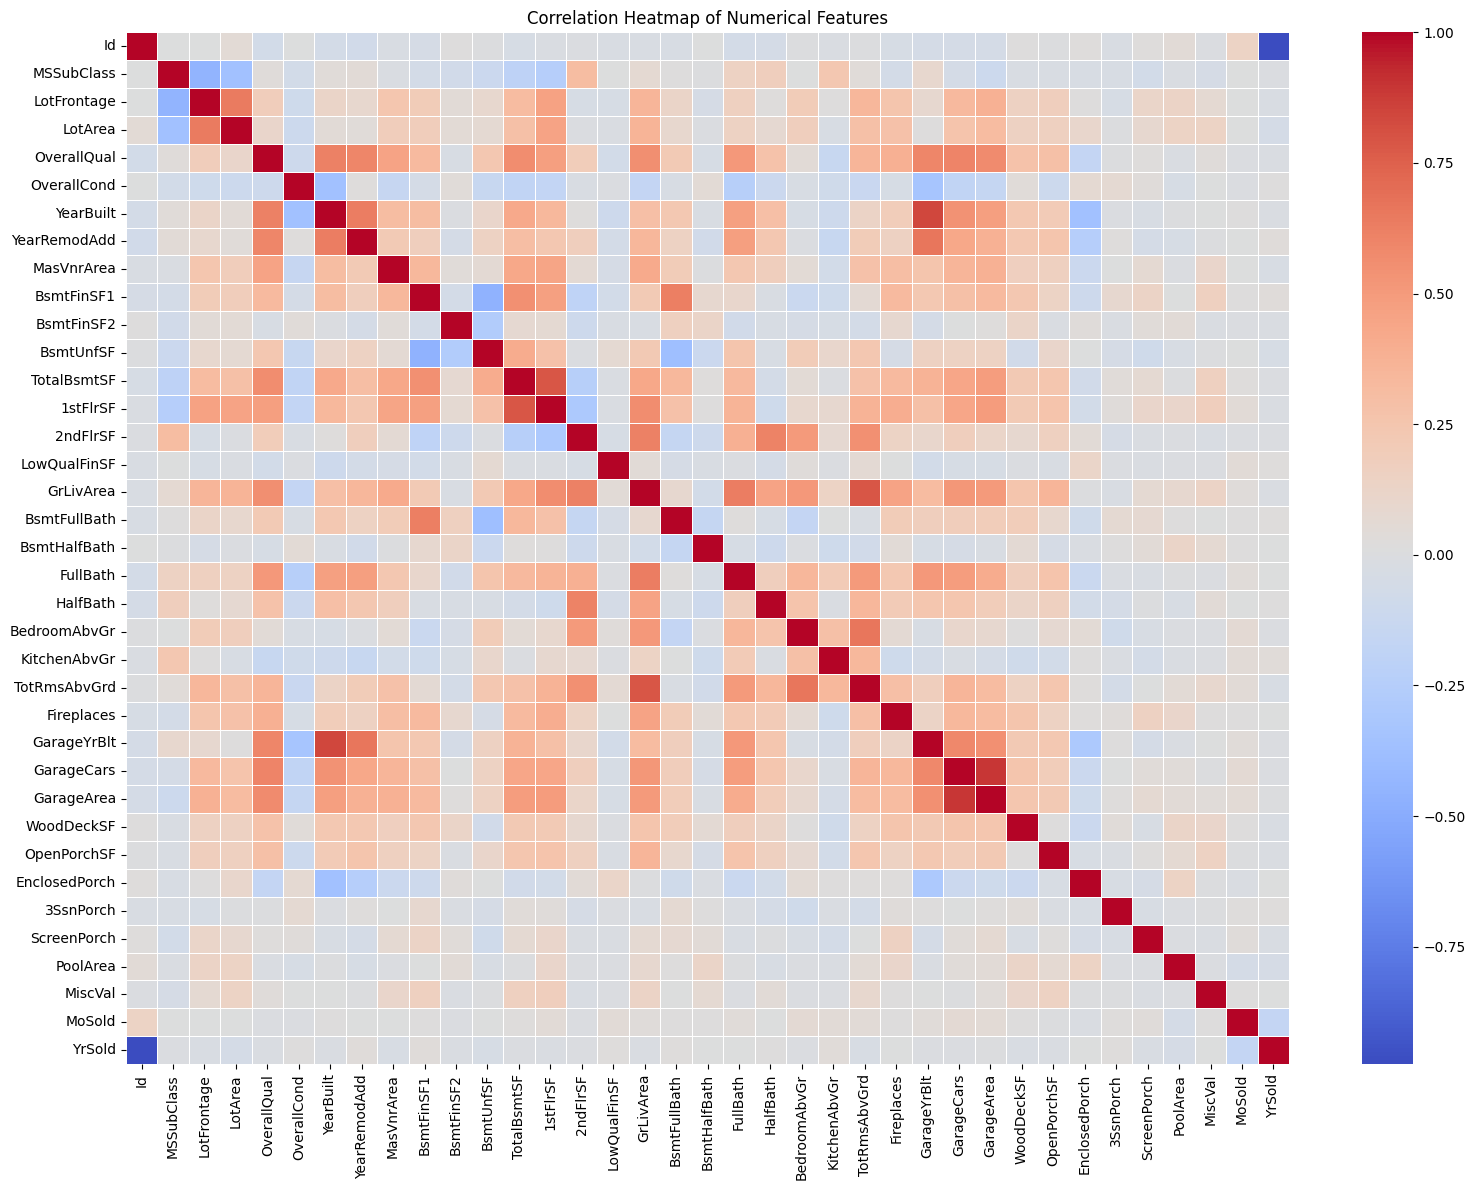

In [27]:
numeric_df = test_df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

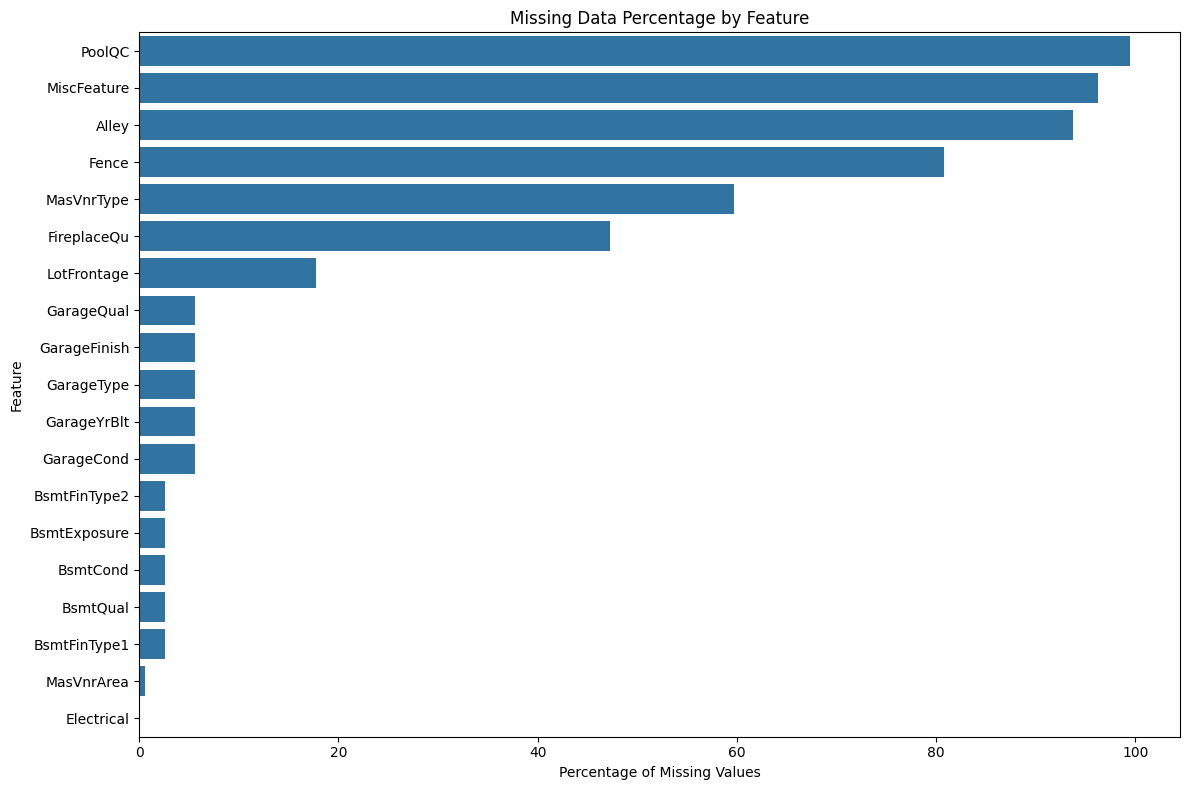

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_percent_test = test_df.isnull().mean().sort_values(ascending=False) * 100
missing_percent_test = missing_percent[missing_percent > 0]

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percent_test.values, y=missing_percent_test.index)
plt.title('Missing Data Percentage by Feature')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [29]:
missing_ratio = test_df.isnull().sum() / len(test_df)
cols_to_drop = missing_ratio[missing_ratio > 0.2].index
df_cleaned_test = test_df.drop(columns=cols_to_drop)

In [30]:
numerical_cols_test = df_cleaned_test.select_dtypes(include=['int64', 'float64']).columns


In [31]:
df_cleaned_test[numerical_cols] = df_cleaned_test[numerical_cols].fillna(df_cleaned_test[numerical_cols].median())
print(df_cleaned_test[numerical_cols].isnull().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [32]:

categorical_cols = df_cleaned_test.select_dtypes(include=['object']).columns

df_cleaned_test[categorical_cols] = df_cleaned_test[categorical_cols].fillna('Unknown')

df_cleaned_test[categorical_cols].isnull().sum()

,0
MSZoning,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0
LandSlope,0
Neighborhood,0
Condition1,0
Condition2,0


In [33]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df_cleaned_test.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    df_cleaned_test[col] = le.fit_transform(df_cleaned_test[col].astype(str))

In [35]:
yhat_log = best_model.predict(df_cleaned_test)
yhat = np.expm1(yhat_log)

<ipython-input-35-a5fc6e8c86d6>:2: RuntimeWarning: overflow encountered in expm1
  yhat = np.expm1(yhat_log)


In [37]:
import pandas as pd
test_ids = df_cleaned_test['Id']
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": yhat
})

submission.to_csv("submission.csv", index=False)
print("Finished save submission.csv")


Finished save submission.csv
